# Programming languages dataset

Questions we may ask : 
- which are the most popular languages (and does this depend on the 'metric' we use the gauge popularity )?  metrics -> books/papers, github , wikipedia , 'language rank'
- do certain feautures always tend to appear in the most popular languages (when doing this you could see how ubiquitous the features are anyways, i.e if 95% of languages have it, it'll probably be in the popular ones)
- which languages have the most active users (num of books / github against num users / jobs)
- something with a dendogram for related langauges ??
- some kind of combo of appeared/ country of origin (that graph with coloured different size circles using this maybe)
- most common comment character / least common ? 
- time spent in development (first commit to last) / first appeared to latest activity 

cleaning -> NaNs, break up the creators column into their individual names (and then we could maybe look to see if anyone made more than one language)


features -> open-source, has commnets , has indentation. 


## Data Overview

We begin by importing  all the necessary libraries, reading in the dataset from github, and looking at the first couple of lines to get a picture of the data. 

After a few attempts where there was an issue with reading in the lines, I found that in the stringToken column, as lot of values had a " character without a pair. This caused an issue for the parsers, so I replaced all instances of these in the csv file with \". This made sure the csv became readable and from looking at the shape we appear to have successfully translated all the rows, as the documentation tells us there should be 5008 instances of id, which is exactly the number of rows we have. We also can see there are 393 so it would probably be helpful to strip these down, as not all of them will be useful.

In [280]:
# Import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=SyntaxWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import circlify
import scipy
import geopandas

PASTELS = sns.color_palette('pastel')
COLOUR_SET = sns.color_palette('Dark2')
TITLE_FONT = dict(fontweight="bold",fontsize=14)

In [281]:
# Read in data
language_url = "https://pldb.com/languages.csv"
df = pd.read_csv('../csv files/pldb.csv',sep=',')
print(df.shape)
df.head()

(5008, 393)


C:\Users\annab\AppData\Local\Temp\ipykernel_37516\3375633267.py:3: DtypeWarning: Columns (4,9,11,12,13,14,24,25,33,34,40,41,55,57,59,60,61,62,64,65,72,73,74,82,91,97,103,108,109,112,118,119,120,121,123,124,126,127,128,129,130,134,136,138,140,141,142,143,144,146,147,150,151,152,154,155,156,157,158,161,164,165,167,168,169,170,171,172,173,174,175,176,180,184,185,188,189,190,191,192,194,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,35

,id,name,appeared,creators,maintainers,measurements,tags,rijuRepl_website,website,spec,...,githubBigQuery,linguistGrammarRepo,hackerNewsDiscussions,isbndb,githubLanguage,indeedJobs,linkedInSkill,stackOverflowSurvey,semanticScholar,goodreads
0,javascript,JavaScript,1995,Brendan Eich,NaN,143,pl,NaN,NaN,https://ecma-international.org/publications-an...,...,JavaScript,https://github.com/atom/language-javascript,NaN,year|publisher|title|authors|isbn13\n2014|Wile...,JavaScript,javascript developer,javascript,NaN,year|title|doi|citations|influentialCitations|...,title|year|author|goodreadsId|rating|ratings|r...
1,c,C,1972,Dennis Ritchie,NaN,98,pl,NaN,NaN,https://www.iso-9899.info/wiki/The_Standard,...,C,https://github.com/textmate/c.tmbundle,NaN,year|publisher|title|authors|isbn13\n2003|McGr...,C,c engineer,c,NaN,year|title|doi|citations|influentialCitations|...,NaN
2,python,Python,1991,Guido van Rossum,NaN,119,pl,https://www.python.org/,https://www.python.org/,https://docs.python.org/3/reference/,...,Python,https://github.com/tree-sitter/tree-sitter-python,NaN,year|publisher|title|authors|isbn13\n2014|No S...,Python,python engineer,python,NaN,year|title|doi|citations|influentialCitations|...,title|year|author|goodreadsId|rating|ratings|r...
3,java,Java,1995,James Gosling,NaN,108,pl,NaN,https://openjdk.org/,https://docs.oracle.com/javase/specs/,...,Java,https://github.com/textmate/java.tmbundle,NaN,year|publisher|title|authors|isbn13\n2017|Pear...,Java,java engineer,java,NaN,year|title|doi|citations|influentialCitations|...,title|year|author|goodreadsId|rating|ratings|r...
4,cpp,C++,1985,Bjarne Stroustrup,NaN,78,pl,NaN,http://isocpp.org/,https://isocpp.org/std/the-standard,...,C++,https://github.com/textmate/c.tmbundle,NaN,year|publisher|title|authors|isbn13\n2011|PEAR...,C++,c++ engineer,c++,NaN,year|title|doi|citations|influentialCitations|...,NaN


In order to thin out the columns, firstly we should consider the number of NaN values in each column. From looking at the documentation, there are a lot of columns with less than 5% of the values filled out. There are some issues with the approach of just removing all these columns though, as some of them are booleans and it's possible that the NaN values should just be replaced with false. It's worth looking into these columns to see how they have been filled out. As an example we look at a couple of the feature columns.

In [282]:
df[['hasForLoops','hasExports','hasDynamicTyping','hasConditionals']].agg(pd.value_counts)

,hasForLoops,hasExports,hasDynamicTyping,hasConditionals
False,NaN,NaN,NaN,3
True,7.0,2.0,2.0,76


Clearly filling in the NaNs with just False would not be a good way to deal with this, as it's extremely unlikely only 7 langauges have for loop, and even fewer have dynamic typing. As a result it would probably just be best to remove all the columns with less than 5% of the values filled, as was originally the plan, as it will be extremely difficult to salvage any of these sparsely populated columns without going through them individually and with knowledge of where all the data came from.

In [283]:
## REMOVE EMPTY COLUMNS
five_percent = df.shape[0] * 0.95
null_counts = df.isnull().sum()
sparse_cols = null_counts[null_counts >= five_percent].index.to_list()
df.drop(columns=sparse_cols,inplace=True)
print(df.shape)
print(df.columns)
df

(5008, 105)
Index(['id', 'name', 'appeared', 'creators', 'measurements', 'tags', 'website',
       'foundationScore', 'latestVersion', 'exampleCount',
       ...
       'wikipedia', 'bookCount', 'paperCount', 'hopl', 'domainName',
       'githubBigQuery', 'linguistGrammarRepo', 'isbndb', 'githubLanguage',
       'semanticScholar'],
      dtype='object', length=105)


,id,name,appeared,creators,measurements,tags,website,foundationScore,latestVersion,exampleCount,...,wikipedia,bookCount,paperCount,hopl,domainName,githubBigQuery,linguistGrammarRepo,isbndb,githubLanguage,semanticScholar
0,javascript,JavaScript,1995,Brendan Eich,143,pl,NaN,505,es14,5,...,https://en.wikipedia.org/wiki/JavaScript,351.0,48.0,https://hopl.info/showlanguage.prx?exp=2133,NaN,JavaScript,https://github.com/atom/language-javascript,year|publisher|title|authors|isbn13\n2014|Wile...,JavaScript,year|title|doi|citations|influentialCitations|...
1,c,C,1972,Dennis Ritchie,98,pl,NaN,394,C17,5,...,https://en.wikipedia.org/wiki/C_(programming_l...,78.0,19.0,https://hopl.info/showlanguage.prx?exp=577,NaN,C,https://github.com/textmate/c.tmbundle,year|publisher|title|authors|isbn13\n2003|McGr...,C,year|title|doi|citations|influentialCitations|...
2,python,Python,1991,Guido van Rossum,119,pl,https://www.python.org/,388,3.12.3,3,...,https://en.wikipedia.org/wiki/Python_(programm...,342.0,52.0,https://hopl.info/showlanguage.prx?exp=1658,python.org,Python,https://github.com/tree-sitter/tree-sitter-python,year|publisher|title|authors|isbn13\n2014|No S...,Python,year|title|doi|citations|influentialCitations|...
3,java,Java,1995,James Gosling,108,pl,https://openjdk.org/,137,20,6,...,https://en.wikipedia.org/wiki/Java_(programmin...,401.0,37.0,https://hopl.info/showlanguage.prx?exp=2131,NaN,Java,https://github.com/textmate/java.tmbundle,year|publisher|title|authors|isbn13\n2017|Pear...,Java,year|title|doi|citations|influentialCitations|...
4,cpp,C++,1985,Bjarne Stroustrup,78,pl,http://isocpp.org/,282,C++20,6,...,https://en.wikipedia.org/wiki/C++,128.0,6.0,https://hopl.info/showlanguage.prx?exp=1202,isocpp.org,C++,https://github.com/textmate/c.tmbundle,year|publisher|title|authors|isbn13\n2011|PEAR...,C++,year|title|doi|citations|influentialCitations|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,brackets-editor,brackets-editor,2012,NaN,4,editor,NaN,0,NaN,0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,clion-editor,clion-editor,2015,NaN,4,editor,NaN,0,NaN,0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5005,code-blocks-editor,code-blocks-editor,2005,NaN,4,editor,NaN,0,NaN,0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5006,codelite-editor,codelite-editor,2006,NaN,4,editor,NaN,0,NaN,0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This has greatly reduced the number of columns, down to 105, but there are still quite a lot which are in no way helpful e.g the urls and names of books/papers about the language. To get rid of the columns filled with hyperlinks, will first replace any URLs with NaN, and then remove sparse columns similarly to before. We also remove a few columns which we visually see are not particularly useful, such as descriptions, version numbers, example snippets and file extension infomation.

In [284]:
print(df['id'].isnull().sum())
df = df.replace(r"(^https://)|(^http://)",np.NaN,regex=True)
null_counts2 = df.isnull().sum()
extra_cols_to_drop = ['latestVersion','isbndb','semanticScholar','latestMajorVersion','wikipedia_summary','description',
       'githubRepo_description', 'rijuRepl_description', 'githubLanguage_fileExtensions', 'leachim6_fileExtensions',
       'pygmentsHighlighter_fileExtensions', 'linguistGrammarRepo_example', 'wikipedia_example', 'leachim6_example','example','domainName',
       'leachim6_filepath','fileType']
sparse_cols2 = null_counts2[null_counts2 >= five_percent].index.to_list()
df.drop(columns= [*sparse_cols2, *extra_cols_to_drop],inplace=True)
df
print(df['id'].isnull().sum())

0
0


In [285]:
PASTELS = sns.color_palette("pastel")
colours = dict(zip(['github','wikipedia','repoStats','linguist','is','has','uses',None],[0,1,2,3,4,4,4,6]))

def colouring(x):
    match = re.search(r'(^github)|(^wikipedia)|(^repoStats)|(^linguist)|(^is)|(^has)|(^uses)',x)
    if match is not None:
        return PASTELS[colours[match.group(0)]]
    return PASTELS[colours[None]]

def format(x):
    if len(x) > 29:
        s = x.split("_")
        return f"{s[0]}_\n{s[1]}"
    return x

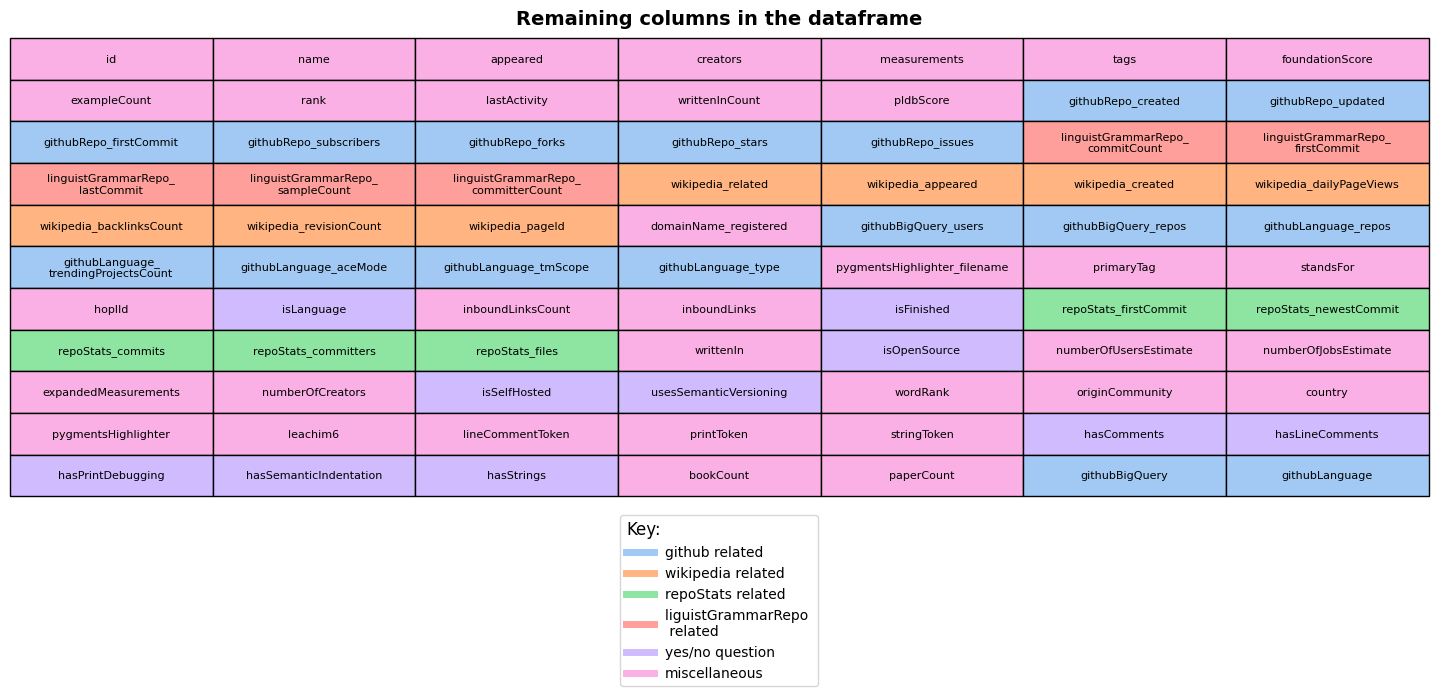

In [286]:
fig1,ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1]},figsize=(15,7))
[ax1,ax2] = ax.ravel()
ax1.axis('off') ; fig1.tight_layout()
ax1.set_title("Remaining columns in the dataframe",**TITLE_FONT)

colours_set = np.array(list(map(colouring,df.columns)),dtype="f,f,f").reshape(-1,7)
formatted_columns = np.array(list(map(format,df.columns))).reshape(-1,7)
table = ax1.table(cellText=formatted_columns, cellColours = colours_set ,loc='center',cellLoc='center')
table.auto_set_font_size(False); table.set_fontsize(8)
table.scale(1,2.5)

handles = [plt.Line2D([0], [0], c=x,linewidth=5) for x in [*PASTELS[0:5],PASTELS[6]]]
ax2.axis('off')
ax2.legend(handles=handles,labels=['github related','wikipedia related','repoStats related','liguistGrammarRepo \n related','yes/no question','miscellaneous'],
           loc='center',title="Key:",title_fontsize=12,alignment='left')

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    5008 non-null   object 
 1   name                                  5008 non-null   object 
 2   appeared                              5008 non-null   int64  
 3   creators                              1479 non-null   object 
 4   measurements                          5008 non-null   int64  
 5   tags                                  5008 non-null   object 
 6   foundationScore                       5008 non-null   int64  
 7   exampleCount                          5008 non-null   int64  
 8   rank                                  5008 non-null   int64  
 9   lastActivity                          5008 non-null   int64  
 10  writtenInCount                        1165 non-null   float64
 11  pldbScore        

Now we are left with 77 columns containing infomation we have a way to compare and analyse. Finally, we want to ensure every column is of the correct type, as from df.info() we see only 2 columns are classed as booleans when in reality this is definitely more. We also may want to seperate out the creators column, since some languages have more than one creator, leaving us with a total of 88 columns (as we drop the orignal creators column). We note we are left with a lot of float columns that we would rather be ints, but since they are filled with NaNs and it wouldn't be right to just fill these with 0s (as it wouldn't be very accurate to the truth), so we will just leave them be for now.

In [288]:
boolColumns = ['hasComments', 'hasLineComments', 'hasPrintDebugging', 'hasSemanticIndentation', 'hasStrings',
               'isFinished', 'isLanguage','isOpenSource','isSelfHosted','usesSemanticVersioning']
df[boolColumns] = df[boolColumns].astype(bool)
creator_list = [f"creator{x}" for x in np.arange(0,13)]
df[creator_list] = df['creators'].str.split(pat=' and ',n=12,expand=True)
df.drop(columns=['creators'],inplace=True)
df

,id,name,appeared,measurements,tags,foundationScore,exampleCount,rank,lastActivity,writtenInCount,...,creator3,creator4,creator5,creator6,creator7,creator8,creator9,creator10,creator11,creator12
0,javascript,JavaScript,1995,143,pl,505,5,1,2022,NaN,...,None,None,None,None,None,None,None,None,None,None
1,c,C,1972,98,pl,394,5,2,2022,NaN,...,None,None,None,None,None,None,None,None,None,None
2,python,Python,1991,119,pl,388,3,3,2024,32.0,...,None,None,None,None,None,None,None,None,None,None
3,java,Java,1995,108,pl,137,6,4,2024,34.0,...,None,None,None,None,None,None,None,None,None,None
4,cpp,C++,1985,78,pl,282,6,5,2022,NaN,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,brackets-editor,brackets-editor,2012,4,editor,0,0,5004,2012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,clion-editor,clion-editor,2015,4,editor,0,0,5005,2015,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5005,code-blocks-editor,code-blocks-editor,2005,4,editor,0,0,5006,2005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5006,codelite-editor,codelite-editor,2006,4,editor,0,0,5007,2006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lastly since the questions I am looking to answer are focused on programming languages, it's worth filtering out the rows do not fall into this category. We also shorten the name of Arduino Programming Language to Arduino PL, to make the graphs less clunky

In [289]:
pat = re.compile(r'pl')
valid_tags = [i for i in df['tags'].unique() if pat.match(i)] + ['queryLanguage','textMarkup']

df = df[df['tags'].isin(valid_tags)]
df['name'] = df['name'].replace({"Arduino Programming Language" : "Arduino PL"})

C:\Users\annab\AppData\Local\Temp\ipykernel_37516\470911925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].replace({"Arduino Programming Language" : "Arduino PL"})


we make an additional dataframe, which just expands out and correctly formats countries names, so they align with the names used in a .shp of the world

In [290]:
countries = df[['name','country']].copy()
country_replacements = {
    **dict.fromkeys(['United Kingdom','Great Britain','Scotland, United Kingdom','Scotland', 'England', 'N. Ireland','Wales'],'U.K. of Great Britain and Northern Ireland'),
    **dict.fromkeys(['Russia','Union of Soviet Socialist Republics or Russia','Former USSR','Former USSR or Russia'], 'Russian Federation'),
    **dict.fromkeys(['United State','United States', 'USA'],'United States of America'),
    **dict.fromkeys(['Former West Germany or Germany','Former West Germany or Federal Republic of Germany','Federal Republic of Germany'],'Germany'),
    **dict.fromkeys(['Czechia','The Czech Republic'],'Czech Republic'),
    **dict.fromkeys(['South Korea','Korea','Japan or Korea'],'Republic of Korea'),
     'Former USSR or Latvia': 'Latvia',
     'Former Union of Soviet Socialist Republics or Estonia' : 'Estonia',
     'Italia' :'Italy',
     'The Netherlands': 'Netherlands',
     'Dubai' :'United Arab Emirates',
     'Hong Kong (SAR)' : 'Hong Kong',
     'Taiwan or R.O.C' : 'Taiwan',
     "People's Republic of China" :  'China',
     'Brasil':'Brazil',
     'Iran' : 'Iran (Islamic Republic of)',
     'North Cyprus':'Cyprus'}

countries['country'] = countries['country'].replace({' amd ': ' and '},regex=True)
countries[['1','2','3','4','5','6']] = countries['country'].str.split(pat=' and ',n=6,expand=True)
countries[['1','2','3','4','5','6']] = countries[['1','2','3','4','5','6']].map(lambda x: x.strip() if isinstance(x, str) else x).replace(country_replacements)

In [291]:
## metric_cols = ['rank','pldbscore','numberOfUsersEstimate','numberOfJobsEstimate','githubRepo_subscribers', 'wikipedia_dailyPageViews']

## Which are the most popular programming languages?

The first question I want to look at is to see which langauges are the most popular. There are a number of different metric we could measure this by available to us in the dataset so we can look at each of these individually and see if there is a group of languages, or one in particular, which stands out as the most popular.

To begin, the most natural way for us to measure popularity would be to look at the number of users as we have below (it's worth noting that this value is an estimate and may not be entirely accurate). SQL tops the rankings, swiftly followed by JavaScript and Java as would be expected. Python followed shortly after, beaten by both C and C++. A lot of maths/statistics based langauges also appear, with MATLAB, R and SPSS all doing well. 

C:\Users\annab\AppData\Local\Temp\ipykernel_37516\3911405723.py:3: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=most_used_df['numberOfUsersEstimate'],y=most_used_df['name'],hue=most_used_df['name'],palette=COLOUR_SET)


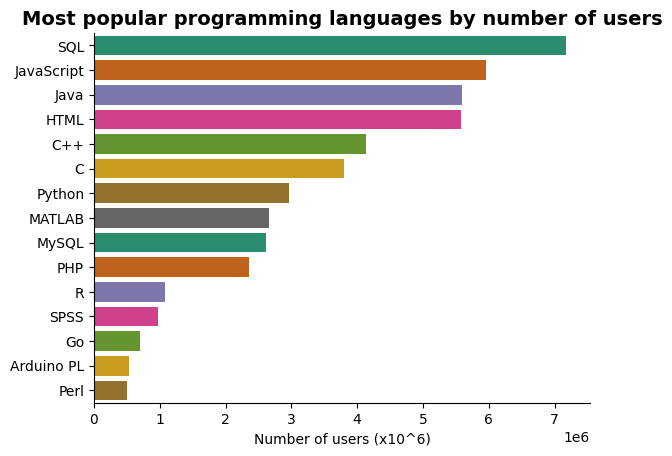

In [292]:
## most number of users 
most_used_df = df.nlargest(15,'numberOfUsersEstimate',keep='all')
ax = sns.barplot(x=most_used_df['numberOfUsersEstimate'],y=most_used_df['name'],hue=most_used_df['name'],palette=COLOUR_SET)
ax.set_title("Most popular programming languages by number of users",**TITLE_FONT)
ax.set_xlabel("Number of users (x10^6)")
ax.set_ylabel("")
ax.spines[['right', 'top']].set_visible(False)

waffle about num users vs num jobs

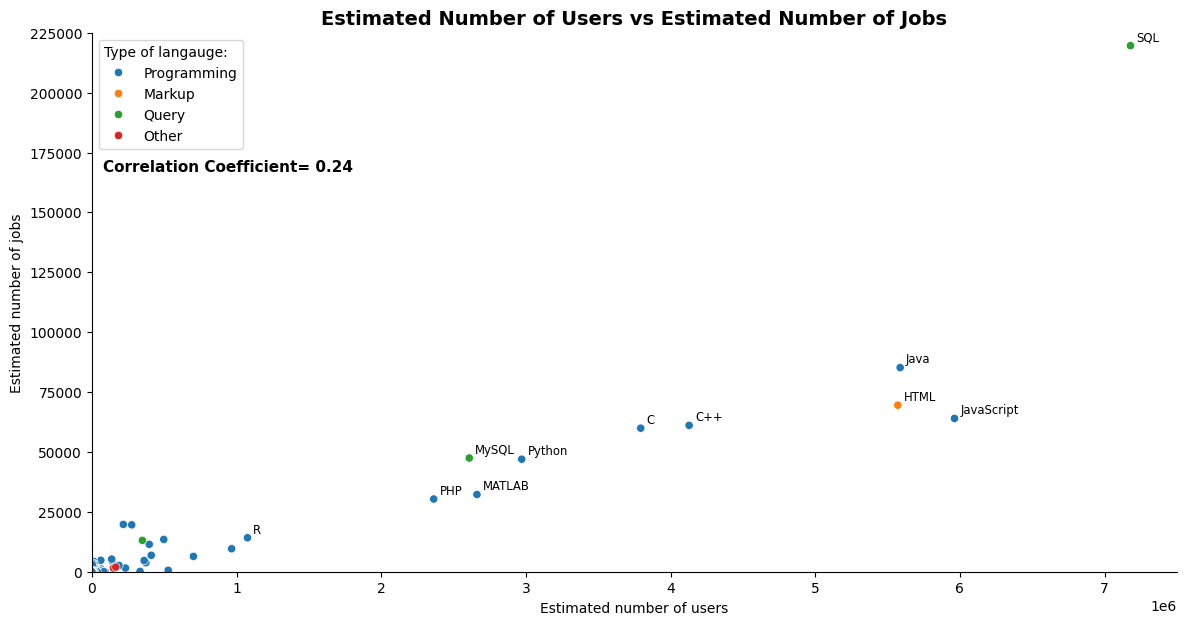

In [293]:
## user numbers vs jobs scatter chart
notable = df.copy().reset_index()
#notable = df[df['numberOfJobsEstimate'] > 10000].reset_index()
notable['type'] = notable['tags'].apply(lambda x: x if (x in ['pl','textMarkup','queryLanguage']) else 'other')
fig = plt.figure(figsize=(14,7))
ax = sns.scatterplot(x=notable['numberOfUsersEstimate'],y=notable['numberOfJobsEstimate'],
                     hue=notable['type'])
handles,_= ax.get_legend_handles_labels()
ax.legend(handles= handles, labels = ['Programming','Markup','Query','Other'],title="Type of langauge: ",alignment='left',loc='upper left')
ax.set_ylim(0,225000); ax.set_ylabel("Estimated number of jobs")
ax.set_xlim(0,7500000); ax.set_xlabel("Estimated number of users")
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Estimated Number of Users vs Estimated Number of Jobs",**TITLE_FONT)
fig.add_axes(ax)
coeff = np.round(scipy.stats.spearmanr(notable['numberOfUsersEstimate'],notable['numberOfJobsEstimate']), 2)
ax.annotate(xy=(80000,167000),text=f'Correlation Coefficient= {coeff[0]}',fontsize=11,fontweight='semibold')

for point in range(0,notable.shape[0]):
     if notable.loc[point,"numberOfUsersEstimate"] > 1000000:
          #print(notable.loc[point,['name','type']])
          ax.text(notable.loc[point,"numberOfUsersEstimate"]+40000, notable.numberOfJobsEstimate[point]+2000, 
          notable.name[point], horizontalalignment='left',  size='small', color='black')

Another metric we could look as is the average number of daily page views on wikipedia. Although this does not directly impact how much the langauge is used, it could give us an indication as to how prominent the language is in the public conscience, and if people are actively searching out infomation about it. 

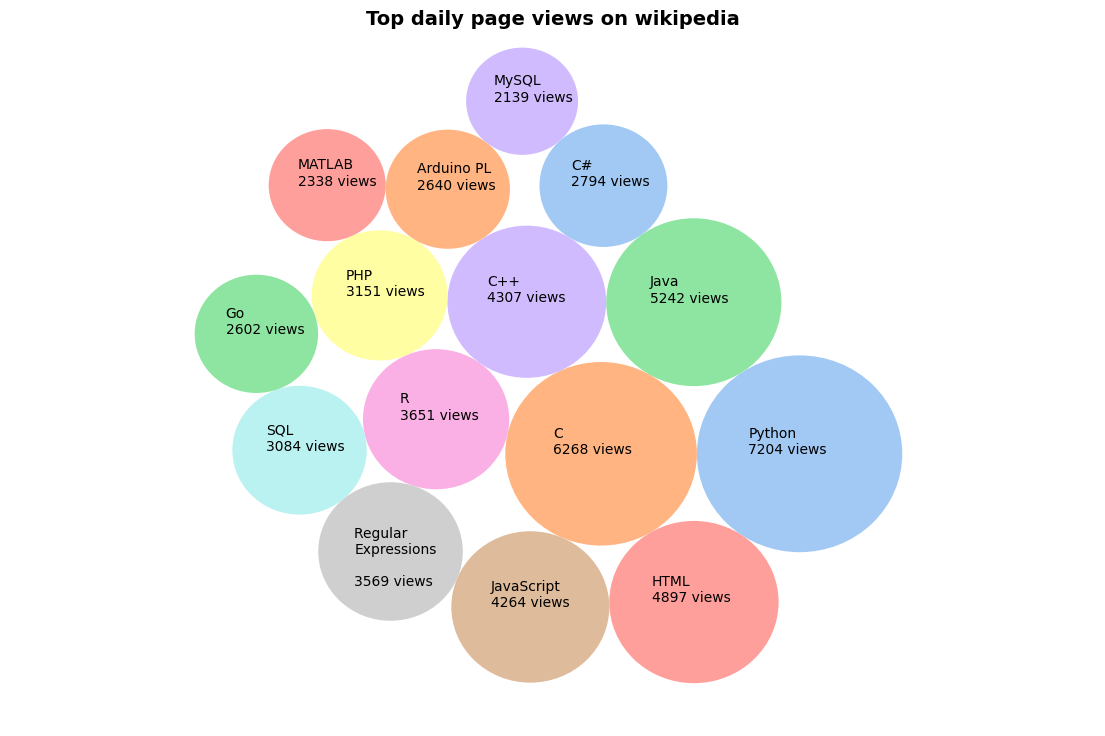

In [294]:
biggest_views = df[['name','wikipedia_dailyPageViews','tags']].nlargest(15,'wikipedia_dailyPageViews',keep='all')
magnitudes, labels = biggest_views['wikipedia_dailyPageViews'].to_list(), biggest_views['name'].to_list()
circles = (circlify.circlify(magnitudes))[::-1]

fig , ax = plt.subplots(figsize=(14,9))
ax.set_xlim(-1.5,1.5); ax.set_ylim(-1,1)
ax.axis('off')
ax.set_title("Top daily page views on wikipedia",**TITLE_FONT)

for idx,(circle,size,language) in enumerate(zip(circles,magnitudes,labels)):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, linewidth=3, fc=PASTELS[idx % 10])) 
    if len(language) < 15:
        ax.annotate(xy=(x-(r/2),y),text=f"{language}\n{int(size)} views")
    else: ax.annotate(xy=(x-(r/2),y-(r/2)),text=f"{language[0:8]}\n{language[8:19]}\n{language[20:]}\n{int(size)} views")

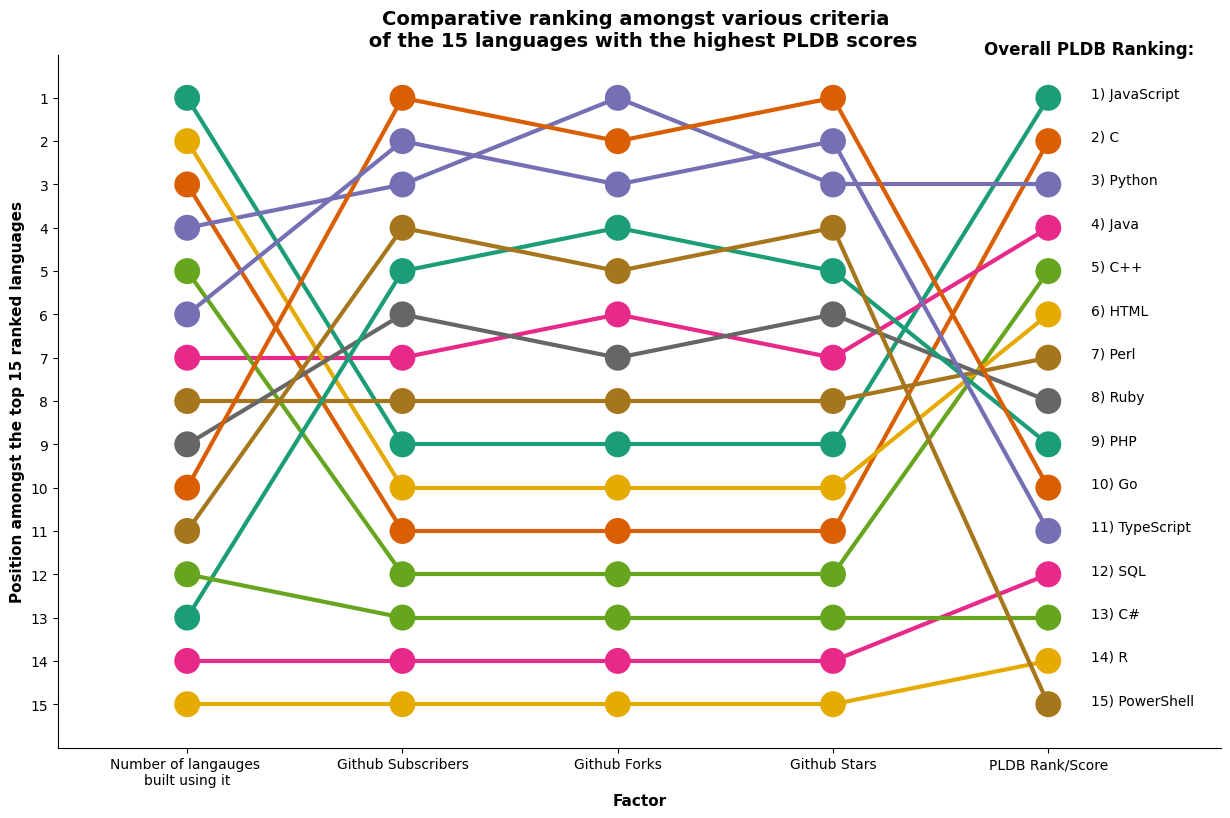

In [295]:
fig, ax = plt.subplots(figsize=(15,9))
metrics = ['foundationScore','githubRepo_subscribers', 'githubRepo_forks', 'githubRepo_stars','rank']
top_ranked = df[(['name'] + metrics)].nsmallest(15,'rank')

for x,asc in zip(metrics,[False,False,False,False,True]):
    top_ranked = top_ranked.sort_values(x,ascending=asc)
    top_ranked[x] = np.arange(1,16)
top_ranked.set_index(keys='name',inplace=True)

ax.set_xlim(-1,26); ax.set_ylim(0,16)
ax.set_yticks(ticks=np.arange(1,16), labels=np.char.mod('%d', np.arange(15,0,-1)))
ax.set_xticks(ticks=np.arange(2,23,5),labels=['Number of langauges \nbuilt using it','Github Subscribers','Github Forks','Github Stars','PLDB Rank/Score'])
ax.set_xlabel("Factor",fontweight='bold',fontsize=11); ax.set_ylabel("Position amongst the top 15 ranked languages",fontweight='bold',fontsize=11)
ax.set_title("Comparative ranking amongst various criteria \n of the 15 languages with the highest PLDB scores",**TITLE_FONT)
ax.spines[['right', 'top']].set_visible(False)
ax.annotate(xy=(20.5,16),text="Overall PLDB Ranking: ",fontweight='semibold',fontsize=12)
for line, (name,colour) in enumerate(zip(top_ranked.index.to_list(),(COLOUR_SET*5))):
    centres = [top_ranked.loc[name,col] for col in metrics]
    for x_offset,y_value in enumerate(centres): 
        ax.add_patch(plt.Circle((x_offset*5 + 2,(16-y_value)),0.3,fc=colour))
        if x_offset < len(centres) - 1:
            ax.add_line(plt.Line2D(np.linspace(x_offset*5 + 2, (x_offset+1)*5 + 2,10), np.linspace(16-centres[x_offset],16-centres[x_offset + 1],10),linewidth=3,color=colour))
    ax.annotate(xy=(23,15-line),text=f"{line+1}) {name}",fontweight='roman')
    

A final metric I had wanted to look at when it comes to the popularity of languages was how much literature had been produced surrounding each language(e.g books and papers written). Ideally I wanted to create some sort of graph looking at the ratio between number of users and amount of literature produced to see which userbases were the most proactive in creating material surrounding their language. However, a quick look at the data showed this was not going to be possible for two reasons; one was that clearly the method used to collect data on the number of books/papers written had not worked correctly as many big languages reported to have had hardly any books written (which is not true), and the other was that for the smaller languages the number of user estimate was only 1, which makes it very difficult to actually gauges the ratios, as in reality these numbers will be in the couple of hundred/thousands at least.

In [296]:
comparison = df[['name','paperCount','bookCount','numberOfUsersEstimate']].copy()
comparison['literature'] = comparison['bookCount'] + comparison['paperCount']
comparison['lit_ratio'] = ((comparison['literature'] / comparison['numberOfUsersEstimate']) * 10000).round(5)
comparison.dropna(subset=['lit_ratio'],inplace=True)
comparison = comparison[(comparison['lit_ratio'] > 0.00005)& (comparison['lit_ratio'] != np.inf)]
comparison.sort_values('lit_ratio',ascending=False)

,name,paperCount,bookCount,numberOfUsersEstimate,literature,lit_ratio
2453,frame,12.0,0.0,1,12.0,120000.00000
3660,coherence,11.0,0.0,1,11.0,110000.00000
2700,empirical,0.0,5.0,1,5.0,50000.00000
2721,links,5.0,0.0,1,5.0,50000.00000
2679,AspectC++,5.0,0.0,1,5.0,50000.00000
...,...,...,...,...,...,...
125,SaltStack,0.0,1.0,34669,1.0,0.28844
1,C,19.0,78.0,3793768,97.0,0.25568
5,HTML,7.0,116.0,5570873,123.0,0.22079
64,SPSS,5.0,14.0,965674,19.0,0.19675


## Origins 

Looking at when and where the programming languages have been created. Is there any link between the most common langauges, and their date of origin, and 

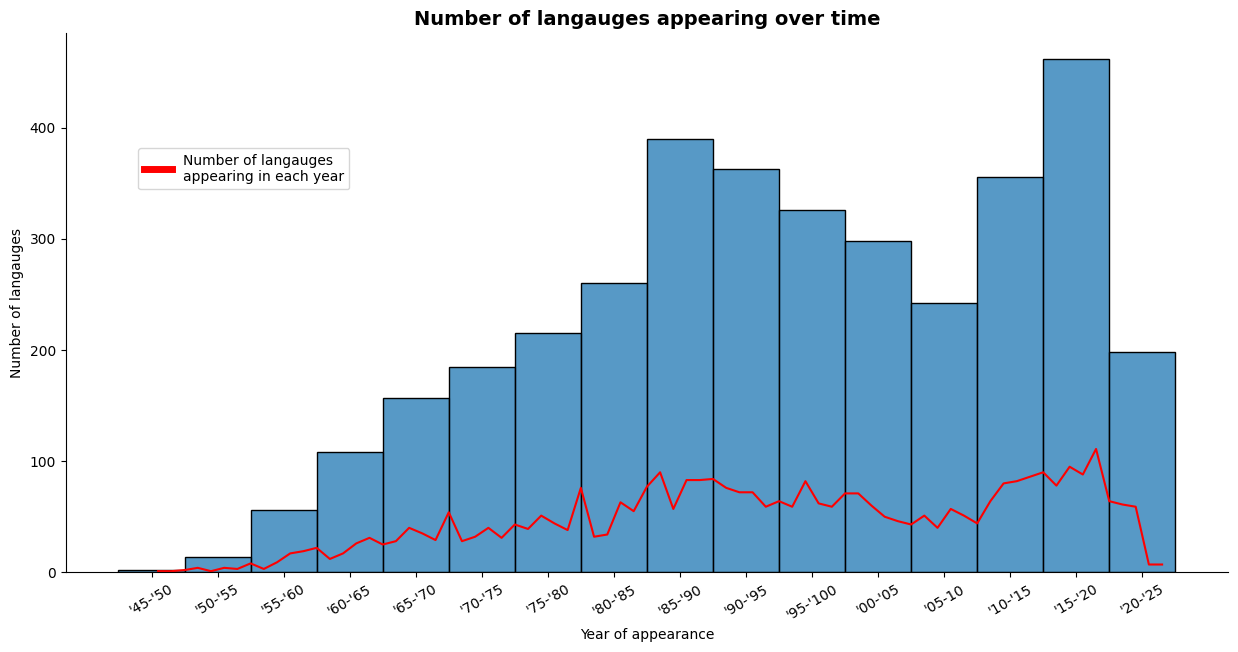

In [297]:
## histogram of date of appearance 
fig = plt.figure(figsize=(15,7))
ax = sns.histplot(df['appeared'],binwidth=5,binrange=(1945,2025))
# no. of languages created in each year
app_years = df['appeared'].value_counts().sort_index()
sns.lineplot(ax=ax,data=app_years,color='red')
fig.add_axes(ax)
ax.set_xticks(ticks=np.arange(1947.5,2027.5,5),labels=[f"'{x}-'{x+5}" for x in(np.arange(45,100,5))] + ["'00-'05","'05-10"] + [f"'{x}-'{x+5}" for x in(np.arange(10,25,5))])
ax.tick_params(axis='x',rotation=30)
ax.set_xlabel("Year of appearance"); ax.set_ylabel("Number of langauges")
ax.set_title("Number of langauges appearing over time",**TITLE_FONT)
ax.legend(handles=[(plt.Line2D([0],[0],c='red',linewidth=5))],labels=['Number of langauges \nappearing in each year'],bbox_to_anchor=(0.25,0.8),loc='upper right')
ax.spines[['top','right']].set_visible(False)

note when a lot of the popular langauges first started to appear, and the fact that pretty much every popular langauge is still being updated today.

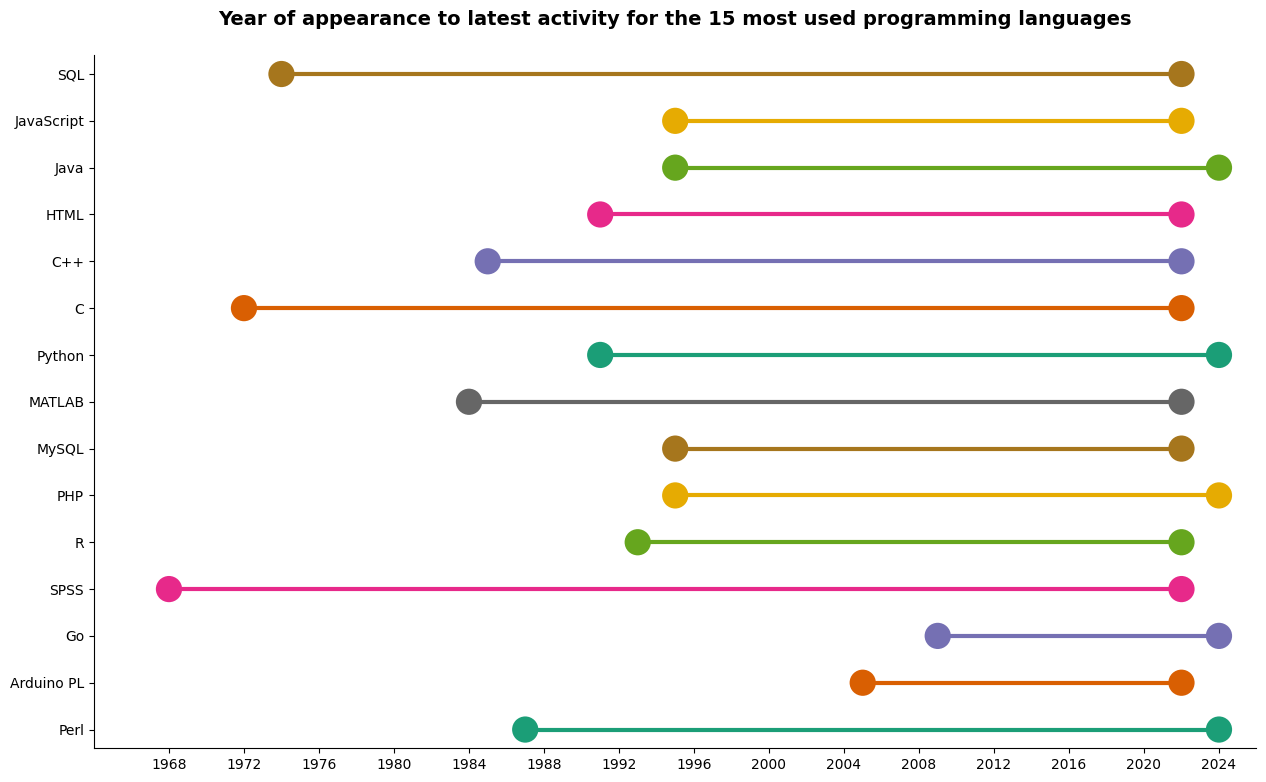

In [298]:
most_used_df = df.nlargest(15,'numberOfUsersEstimate',keep='all')[::-1]
labels = most_used_df['name'].to_list()
start_dates = most_used_df['appeared'].to_list()
end_dates = most_used_df['lastActivity'].to_list()

fig , ax = plt.subplots(figsize=(15,9))
ax.set_xlim(1964,2026),ax.set_ylim(-1,36)
ax.set_yticks(ticks = np.arange(0,37,2.5),labels=labels)
ax.set_xticks(ticks=np.arange(1968,2028,4))
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Year of appearance to latest activity for the 15 most used programming languages\n",**TITLE_FONT)
for idx,(start,end,language) in enumerate(zip(start_dates,end_dates,labels)):
    colour=COLOUR_SET[idx % 8]; height = idx*2.5
    ax.add_patch(plt.Circle(xy=(start,height),radius=0.7,fc=colour))
    ax.add_patch(plt.Circle(xy=(end,height),radius=0.7,fc=colour))
    ax.add_line(plt.Line2D(np.linspace(start,end,10),[height],linewidth=3,color=colour))

2784


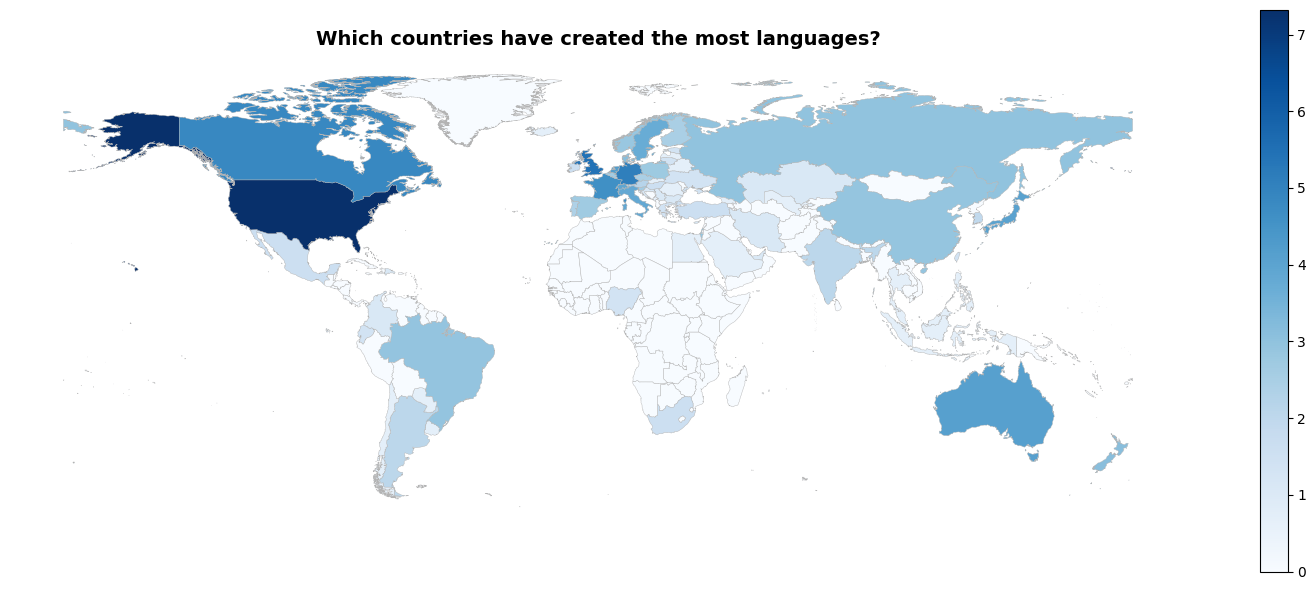

In [299]:
map_file = geopandas.read_file("../map files/world-administrative-boundaries.shp")
map_file = map_file[['name','color_code','geometry']]
all_countries = map_file['name'].to_list()

x = countries[['1','2','3','4','5','6']].melt(value_name='name')['name'].value_counts().reindex(all_countries,fill_value=0).reset_index()
print(x['count'].sum())
x['count'] = np.log(x['count'] + 1 )
y  = map_file.merge(x,on='name')

fig, ax = plt.subplots(figsize=(15,6))
ax.spines[['right', 'top','bottom','left']].set_visible(False)
ax.set_xticks([]); ax.set_yticks([])
ax.set_title("Which countries have created the most languages?",fontweight='bold',fontsize=14)
y.plot(column='count',cmap='Blues', ax=ax,edgecolor="0.7",linewidth=0.3)

bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=x['count'].max()))
cbar = fig.colorbar(bar_info,ax=ax)
fig.tight_layout()

looking at the amount of different languages the USA contributed something to the development of. 

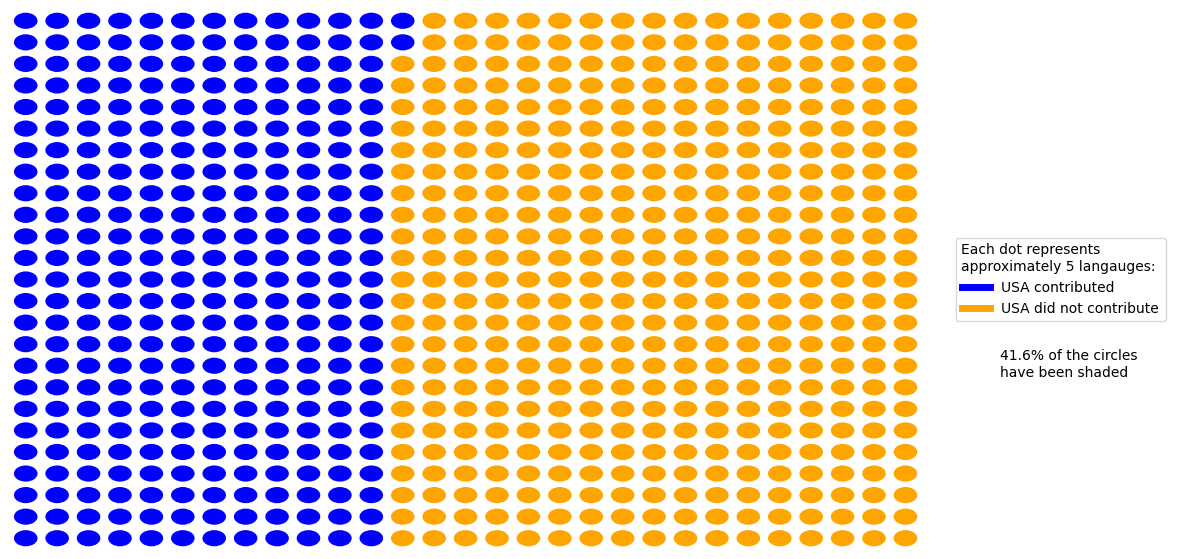

In [300]:
usa_original = x[x['name'] == 'United States of America']['count'].values[0]
usa_contributions = (int(np.exp(usa_original)-1))
total_langauges = countries['name'].shape[0]
shaded = usa_contributions / 5
percent = round(usa_contributions/total_langauges * 100,1)

fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlim(-1,73); ax.set_ylim(4,54)
ax.legend(handles=[plt.Line2D([0],[0],c='blue',linewidth=5),plt.Line2D([0],[0],c='orange',linewidth=5)],
          labels=['USA contributed', 'USA did not contribute'], loc='center right',title="Each dot represents \napproximately 5 langauges: ")
ax.annotate(xy= (62,20),text=f"{percent}% of the circles\nhave been shaded")
ax.spines[['right', 'top','left','bottom']].set_visible(False)
ax.set_xticks([]); ax.set_yticks([])
shaded_counter = 0
for x_coord in range(0,29):
    for y in range(24,-1,-1):
        if shaded_counter < shaded:
            ax.add_patch(plt.Circle((x_coord*2,y*2 + 5),0.75,fc='blue'))
            shaded_counter += 1
        else:
            ax.add_patch(plt.Circle((x_coord*2,y*2 + 5),0.75,fc='orange'))

In [301]:
df[creator_list].melt().groupby('value').size().sort_values()

value
A.V. Tkachuk              1
Microsoft                 1
Mikail Khan               1
Mike Bostock              1
Mike Jenkins              1
                         ..
John McCarthy             4
David A. Moon             5
John Backus               6
Wouter Van Oortmerssen    6
Niklaus Wirth             9
Length: 1145, dtype: int64

## Common features across langauges

In [305]:
df.columns

Index(['id', 'name', 'appeared', 'measurements', 'tags', 'foundationScore',
       'exampleCount', 'rank', 'lastActivity', 'writtenInCount', 'pldbScore',
       'githubRepo_created', 'githubRepo_updated', 'githubRepo_firstCommit',
       'githubRepo_subscribers', 'githubRepo_forks', 'githubRepo_stars',
       'githubRepo_issues', 'linguistGrammarRepo_commitCount',
       'linguistGrammarRepo_firstCommit', 'linguistGrammarRepo_lastCommit',
       'linguistGrammarRepo_sampleCount', 'linguistGrammarRepo_committerCount',
       'wikipedia_related', 'wikipedia_appeared', 'wikipedia_created',
       'wikipedia_dailyPageViews', 'wikipedia_backlinksCount',
       'wikipedia_revisionCount', 'wikipedia_pageId', 'domainName_registered',
       'githubBigQuery_users', 'githubBigQuery_repos', 'githubLanguage_repos',
       'githubLanguage_trendingProjectsCount', 'githubLanguage_aceMode',
       'githubLanguage_tmScope', 'githubLanguage_type',
       'pygmentsHighlighter_filename', 'primaryTag', 'st

ValueError: 'cellColours' must have 2 rows

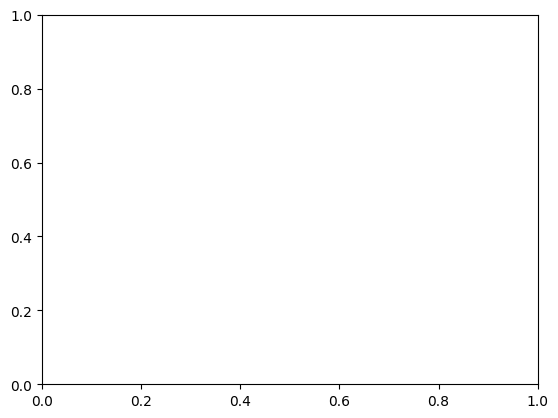

In [315]:
features = ['hasComments', 'hasLineComments', 'hasPrintDebugging','hasSemanticIndentation', 'hasStrings']
x = np.array((df[(df['hasComments']) | (df['hasStrings'])].agg({'name': 'count',**dict.fromkeys(features,'sum')})).reset_index()).reshape(2,6)
plt.table(cellText=x, cellColours = colours_set ,loc='center',cellLoc='center')
df[~df['hasComments']]

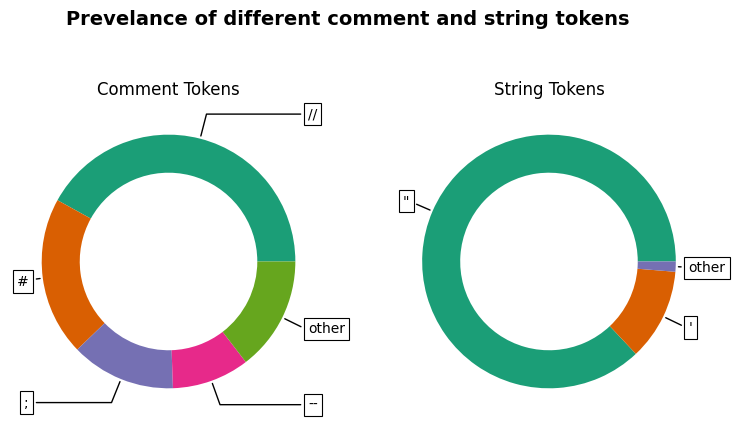

In [303]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(9,9))
fig.suptitle("Prevelance of different comment and string tokens",**TITLE_FONT)

def make_chart(axis,col,labels,title):
    tokens = df[~df[col].isnull()][col].value_counts()
    other_values = tokens[tokens < 20].sum()
    data = pd.concat([tokens[tokens >= 20], pd.Series({'other' : other_values})],axis=0)
    wedges, _ = axis.pie(x=data,wedgeprops=dict(width=0.3),colors=COLOUR_SET)
    axis.set_title(title)

    #from pieplot documentation (build the boxes around the labels)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=0.8)
    kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        axis.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)

make_chart(ax1,'lineCommentToken',['//',"#",";","--","other"],"Comment Tokens")
make_chart(ax2,"stringToken",['"',"'","other"],"String Tokens")
fig.subplots_adjust(top=0.9,bottom=0.5)